In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Hp/Desktop/Bank Churners/BankChurners.csv")
print("df yüklendi")

df yüklendi


In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.drop(columns = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], index=1, inplace=True )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10126 non-null  int64  
 1   Attrition_Flag            10126 non-null  object 
 2   Customer_Age              10126 non-null  int64  
 3   Gender                    10126 non-null  object 
 4   Dependent_count           10126 non-null  int64  
 5   Education_Level           10126 non-null  object 
 6   Marital_Status            10126 non-null  object 
 7   Income_Category           10126 non-null  object 
 8   Card_Category             10126 non-null  object 
 9   Months_on_book            10126 non-null  int64  
 10  Total_Relationship_Count  10126 non-null  int64  
 11  Months_Inactive_12_mon    10126 non-null  int64  
 12  Contacts_Count_12_mon     10126 non-null  int64  
 13  Credit_Limit              10126 non-null  float64
 14  Total_

In [7]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.Attrition_Flag.value_counts(normalize=True)

Existing Customer    0.839325
Attrited Customer    0.160675
Name: Attrition_Flag, dtype: float64

Text(0.5, 1.0, 'Amount of Churners')

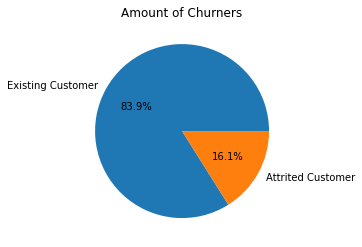

In [9]:
plt.pie(df.Attrition_Flag.value_counts(normalize=True), labels=["Existing Customer", "Attrited Customer"], autopct='%1.1f%%' )
plt.title("Amount of Churners")

In [10]:
income_level = df.Income_Category.value_counts(normalize=True).to_frame().reset_index().rename(columns={"Income_Category":"Oran", "index":"Income_Cat"})

In [11]:
income_level

Income_Cat      Oran
0  Less than $40K  0.351570
1     $40K - $60K  0.176773
2    $80K - $120K  0.151590
3     $60K - $80K  0.138455
4         Unknown  0.109816
5         $120K +  0.071795

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

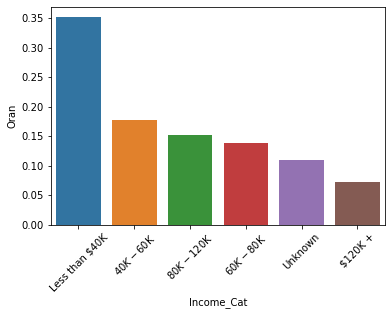

In [12]:
sns.barplot(data=income_level, x="Income_Cat", y="Oran")
plt.xticks(rotation=45)

In [13]:
durum_maas = df.groupby("Attrition_Flag")["Income_Category"].value_counts().to_frame().rename(columns={"Income_Category":"Oran"}).reset_index()

In [14]:
durum_maas

Attrition_Flag Income_Category  Oran
0   Attrited Customer  Less than $40K   612
1   Attrited Customer     $40K - $60K   271
2   Attrited Customer    $80K - $120K   242
3   Attrited Customer     $60K - $80K   189
4   Attrited Customer         Unknown   187
5   Attrited Customer         $120K +   126
6   Existing Customer  Less than $40K  2948
7   Existing Customer     $40K - $60K  1519
8   Existing Customer    $80K - $120K  1293
9   Existing Customer     $60K - $80K  1213
10  Existing Customer         Unknown   925
11  Existing Customer         $120K +   601

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

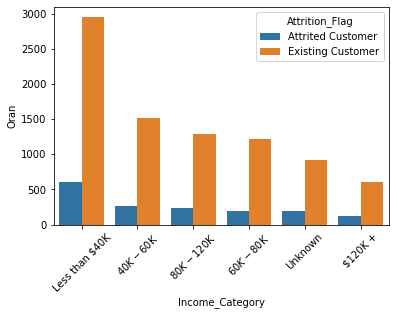

In [15]:
sns.barplot(data=durum_maas, x="Income_Category", y="Oran", hue="Attrition_Flag")
plt.xticks(rotation=45)

In [16]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [17]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Income_Category'], df['Attrition_Flag']))

In [18]:
p

0.024737537664061015

Text(0, 0.5, 'Number of People')

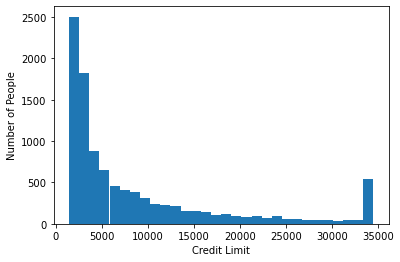

In [19]:
plt.hist(df.Credit_Limit, bins=30)
plt.xlabel("Credit Limit")
plt.ylabel("Number of People")

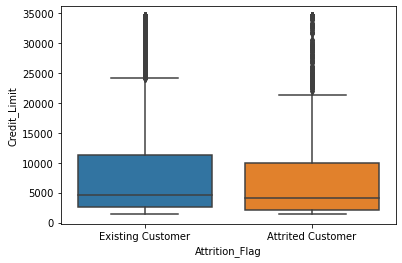

In [20]:
sns.boxplot(data=df, x="Attrition_Flag", y="Credit_Limit")

Çok fazla outliers olmasına rağmen iki tip customer da aynı gözüküyor.

Text(0, 0.5, '# of Customer')

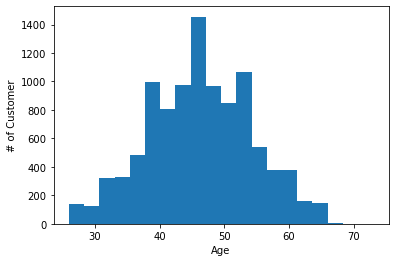

In [21]:
plt.hist(df.Customer_Age, bins=20)
plt.xlabel("Age")
plt.ylabel("# of Customer")

Text(0.5, 1.0, 'Age vs Churners')

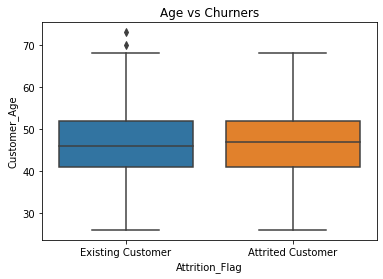

In [22]:
sns.boxplot(data=df, x="Attrition_Flag", y="Customer_Age")
plt.title("Age vs Churners")

In [23]:
gender = df.groupby("Attrition_Flag")["Gender"].value_counts(normalize=True).to_frame().rename(columns={"Gender":"Oran"}).reset_index()

In [24]:
gender

Attrition_Flag Gender      Oran
0  Attrited Customer      F  0.571604
1  Attrited Customer      M  0.428396
2  Existing Customer      F  0.520885
3  Existing Customer      M  0.479115

Text(0.5, 1.0, 'Gender vs Churners')

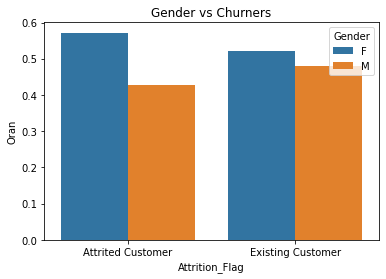

In [25]:
sns.barplot(data=gender, x="Attrition_Flag", y="Oran", hue="Gender",)
plt.title("Gender vs Churners")


In [26]:
pd.crosstab(df['Gender'], df['Attrition_Flag'])

Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                             930               4427
M                             697               4072

In [27]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Gender'], df['Attrition_Flag']))

In [28]:
p

0.00019317924957991587

Gender kredi kartı kullanmamak için bir değişken olabilir.

In [29]:
df.Dependent_count.value_counts(normalize=True).to_frame()

Dependent_count
3         0.269801
2         0.262196
1         0.181513
4         0.155441
0         0.089275
5         0.041774

In [30]:
dependent = df.groupby("Attrition_Flag")["Dependent_count"].value_counts(normalize=True).to_frame().rename(columns={"Dependent_count":"Oran"}).reset_index()

In [31]:
dependent

Attrition_Flag  Dependent_count      Oran
0   Attrited Customer                3  0.296251
1   Attrited Customer                2  0.256300
2   Attrited Customer                1  0.165335
3   Attrited Customer                4  0.159803
4   Attrited Customer                0  0.082975
5   Attrited Customer                5  0.039336
6   Existing Customer                3  0.264737
7   Existing Customer                2  0.263325
8   Existing Customer                1  0.184610
9   Existing Customer                4  0.154606
10  Existing Customer                0  0.090481
11  Existing Customer                5  0.042240

Text(0.5, 1.0, 'Dependent_count vs Churners')

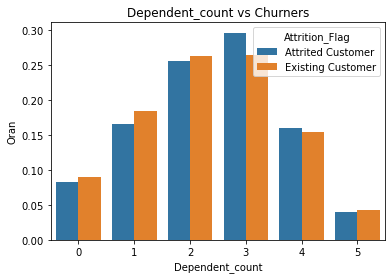

In [32]:
sns.barplot(data=dependent, x="Dependent_count", y="Oran", hue="Attrition_Flag")
plt.title("Dependent_count vs Churners")

In [33]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [34]:
df.Education_Level.value_counts()

Graduate         3127
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

([<matplotlib.patches.Wedge at 0x25adfea6700>,
 [Text(0.6216914436670085, 0.9074688693675563, 'Graduate'),
  Text(-0.9220602898830533, 0.5998373294658976, 'High School'),
  Text(-0.9551207337710627, -0.5456595861163139, 'Unknown'),
  Text(-0.13073983814972673, -1.092202863354873, 'Uneducated'),
  Text(0.6713735867623177, -0.8713538357050485, 'College'),
  Text(0.9952574531087274, -0.46846835755633437, 'Post-Graduate'),
  Text(1.0892494460324373, -0.15341331206263886, 'Doctorate')],
 [Text(0.33910442381836825, 0.49498301965503066, '30.9%'),
  Text(-0.5029419762998472, 0.3271839978904896, '19.9%'),
  Text(-0.5209749456933068, -0.2976325015179894, '15.0%'),
  Text(-0.07131263899076003, -0.5957470163753852, '14.7%'),
  Text(0.3662037745976278, -0.47528391038457185, '10.0%'),
  Text(0.5428677016956694, -0.2555281950307278, '5.1%'),
  Text(0.5941360614722385, -0.08367998839780301, '4.5%')])

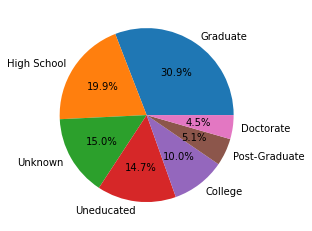

In [35]:
plt.pie(df.Education_Level.value_counts(normalize=True), labels = ['Graduate', 'High School', 'Unknown', 'Uneducated',  'College',
       'Post-Graduate', 'Doctorate'] , autopct='%1.1f%%' )

In [36]:
 education = df.groupby("Attrition_Flag")["Education_Level"].value_counts(normalize=True).to_frame().rename(columns={"Education_Level":"Oran"}).reset_index()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

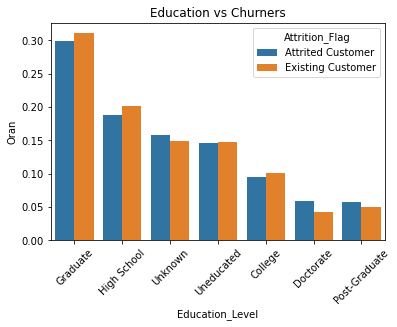

In [37]:
sns.barplot(data=education, x="Education_Level", y="Oran", hue="Attrition_Flag")
plt.title("Education vs Churners")
plt.xticks(rotation=45)

In [38]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Education_Level'], df['Attrition_Flag']))

In [39]:
p

0.05172658872317666

Eğitim seviyeleri arasında kredi kartı kullanmamayı etkileyen bir fark yok.

In [40]:
df.Marital_Status.unique()

array(['Married', 'Unknown', 'Single', 'Divorced'], dtype=object)

In [41]:
marital = df.groupby("Attrition_Flag")["Marital_Status"].value_counts(normalize=True).to_frame().rename(columns={"Marital_Status":"Oran"}).reset_index()

In [42]:
marital

Attrition_Flag Marital_Status      Oran
0  Attrited Customer        Married  0.435771
1  Attrited Customer         Single  0.410572
2  Attrited Customer        Unknown  0.079287
3  Attrited Customer       Divorced  0.074370
4  Existing Customer        Married  0.468055
5  Existing Customer         Single  0.385222
6  Existing Customer       Divorced  0.073773
7  Existing Customer        Unknown  0.072950

Text(0.5, 1.0, 'Marital Status vs Churners')

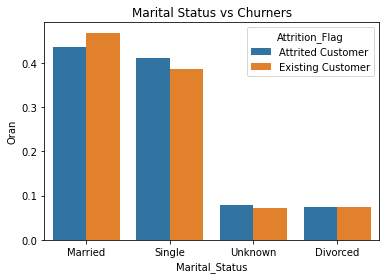

In [43]:
sns.barplot(data=marital, x="Marital_Status", y="Oran", hue="Attrition_Flag")
plt.title("Marital Status vs Churners")

In [44]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Marital_Status'], df['Attrition_Flag']))

In [45]:
p

0.10791993119334421

In [46]:
 card = df.groupby("Attrition_Flag")["Card_Category"].value_counts(normalize=True).to_frame().rename(columns={"Card_Category":"Oran"}).reset_index()

In [47]:
card

Attrition_Flag Card_Category      Oran
0  Attrited Customer          Blue  0.933620
1  Attrited Customer        Silver  0.050400
2  Attrited Customer          Gold  0.012907
3  Attrited Customer      Platinum  0.003073
4  Existing Customer          Blue  0.931404
5  Existing Customer        Silver  0.055654
6  Existing Customer          Gold  0.011178
7  Existing Customer      Platinum  0.001765

Text(0.5, 1.0, 'Card_Category vs Churners')

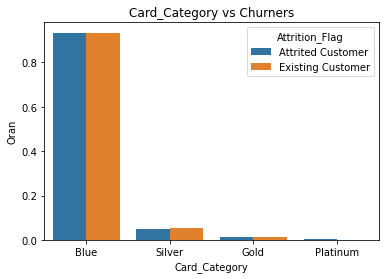

In [48]:
sns.barplot(data=card, x="Card_Category", y="Oran", hue="Attrition_Flag")
plt.title("Card_Category vs Churners")

In [49]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Card_Category'], df['Attrition_Flag']))

In [50]:
p

0.5251240743038745

In [51]:
df.Months_on_book.describe()

count    10126.000000
mean        35.927612
std          7.986408
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

In [52]:
df["Months_on_book_new"] = pd.cut(df.Months_on_book, bins=[13,31,40,60], labels=["az", "orta", "çok"])

In [53]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   
5              36  ...                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   

   Avg_Utilization_Ratio  Months_on_book_new  
0                  0.061                orta  
2                  0.000                orta  
3                  0.760                orta  
4                  0.000                  az  
5                  0.311                orta  

[5 rows x 22 columns]

In [54]:
duration = df.groupby("Attrition_Flag")["Months_on_book_new"].value_counts(normalize=True).to_frame().rename(columns={"Months_on_book_new":"Oran"}).reset_index()

In [55]:
duration

Attrition_Flag Months_on_book_new      Oran
0  Attrited Customer               orta  0.525926
1  Attrited Customer                çok  0.248148
2  Attrited Customer                 az  0.225926
3  Existing Customer               orta  0.504267
4  Existing Customer                 az  0.249170
5  Existing Customer                çok  0.246562

Text(0.5, 1.0, 'Duration vs Churners')

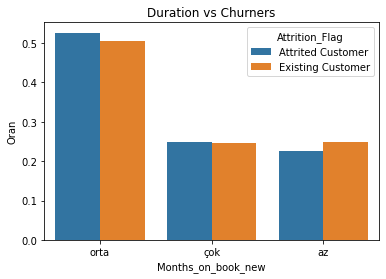

In [56]:
sns.barplot(data=duration, x="Months_on_book_new", y="Oran", hue="Attrition_Flag")
plt.title("Duration vs Churners")

In [57]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Months_on_book_new'], df['Attrition_Flag']))

In [58]:
p

0.11876457983622173

Kategorik değişkeni kullanmadan deneyelim.

In [59]:
duration2 = df.groupby("Attrition_Flag")["Months_on_book"].value_counts(normalize=True).to_frame().rename(columns={"Months_on_book":"Oran"}).reset_index()

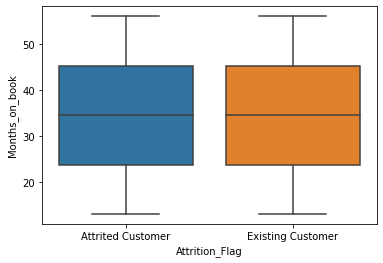

In [60]:
sns.boxplot(data=duration2, x="Attrition_Flag", y="Months_on_book")

In [61]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Months_on_book_new'],
      dtype='object')

In [62]:
df["Total_Relationship_Count"] = df.Total_Relationship_Count.astype(object)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10126 non-null  int64   
 1   Attrition_Flag            10126 non-null  object  
 2   Customer_Age              10126 non-null  int64   
 3   Gender                    10126 non-null  object  
 4   Dependent_count           10126 non-null  int64   
 5   Education_Level           10126 non-null  object  
 6   Marital_Status            10126 non-null  object  
 7   Income_Category           10126 non-null  object  
 8   Card_Category             10126 non-null  object  
 9   Months_on_book            10126 non-null  int64   
 10  Total_Relationship_Count  10126 non-null  object  
 11  Months_Inactive_12_mon    10126 non-null  int64   
 12  Contacts_Count_12_mon     10126 non-null  int64   
 13  Credit_Limit              10126 non-null  floa

In [64]:
relation = df.groupby("Attrition_Flag")["Total_Relationship_Count"].value_counts(normalize=True).to_frame().rename(columns={"Total_Relationship_Count":"Oran"}).reset_index()

In [65]:
relation

Attrition_Flag  Total_Relationship_Count      Oran
0   Attrited Customer                         3  0.245851
1   Attrited Customer                         2  0.212661
2   Attrited Customer                         1  0.143208
3   Attrited Customer                         5  0.139521
4   Attrited Customer                         4  0.138291
5   Attrited Customer                         6  0.120467
6   Existing Customer                         3  0.224144
7   Existing Customer                         4  0.198494
8   Existing Customer                         6  0.196376
9   Existing Customer                         5  0.195788
10  Existing Customer                         2  0.105542
11  Existing Customer                         1  0.079656

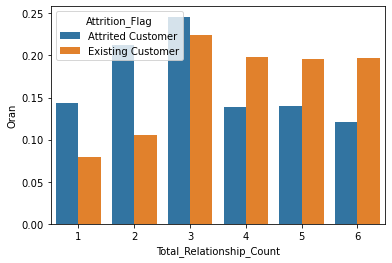

In [66]:
sns.barplot(data=relation, x="Total_Relationship_Count", y="Oran", hue="Attrition_Flag")

In [67]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Total_Relationship_Count'], df['Attrition_Flag']))

In [68]:
p

2.84097785543531e-59

Anlamlı!!!

In [69]:
df.Months_Inactive_12_mon.value_counts()

3    3846
2    3282
1    2232
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [70]:
df["Months_Inactive_12_mon"] = df.Months_Inactive_12_mon.astype(object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10126 non-null  int64   
 1   Attrition_Flag            10126 non-null  object  
 2   Customer_Age              10126 non-null  int64   
 3   Gender                    10126 non-null  object  
 4   Dependent_count           10126 non-null  int64   
 5   Education_Level           10126 non-null  object  
 6   Marital_Status            10126 non-null  object  
 7   Income_Category           10126 non-null  object  
 8   Card_Category             10126 non-null  object  
 9   Months_on_book            10126 non-null  int64   
 10  Total_Relationship_Count  10126 non-null  object  
 11  Months_Inactive_12_mon    10126 non-null  object  
 12  Contacts_Count_12_mon     10126 non-null  int64   
 13  Credit_Limit              10126 non-null  floa

In [72]:
inactive = df.groupby("Attrition_Flag")["Months_Inactive_12_mon"].value_counts(normalize=True).to_frame().rename(columns={"Months_Inactive_12_mon":"Oran"}).reset_index()

In [73]:
inactive

Attrition_Flag  Months_Inactive_12_mon      Oran
0   Attrited Customer                       3  0.507683
1   Attrited Customer                       2  0.310387
2   Attrited Customer                       4  0.079902
3   Attrited Customer                       1  0.061463
4   Attrited Customer                       5  0.019668
5   Attrited Customer                       6  0.011678
6   Attrited Customer                       0  0.009219
7   Existing Customer                       3  0.355336
8   Existing Customer                       2  0.326744
9   Existing Customer                       1  0.250853
10  Existing Customer                       4  0.035887
11  Existing Customer                       5  0.017178
12  Existing Customer                       6  0.012354
13  Existing Customer                       0  0.001647

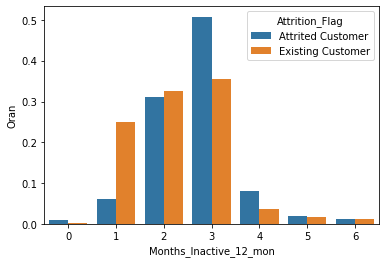

In [74]:
sns.barplot(data=inactive, x="Months_Inactive_12_mon", y="Oran", hue="Attrition_Flag")

In [75]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Months_Inactive_12_mon'], df['Attrition_Flag']))

In [76]:
p

1.790881119553921e-82

Anlamlı!!!

In [77]:
df.Contacts_Count_12_mon.value_counts()

3    3380
2    3226
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

In [78]:
df["Contacts_Count_12_mon"] = df.Contacts_Count_12_mon.astype(object)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10126 non-null  int64   
 1   Attrition_Flag            10126 non-null  object  
 2   Customer_Age              10126 non-null  int64   
 3   Gender                    10126 non-null  object  
 4   Dependent_count           10126 non-null  int64   
 5   Education_Level           10126 non-null  object  
 6   Marital_Status            10126 non-null  object  
 7   Income_Category           10126 non-null  object  
 8   Card_Category             10126 non-null  object  
 9   Months_on_book            10126 non-null  int64   
 10  Total_Relationship_Count  10126 non-null  object  
 11  Months_Inactive_12_mon    10126 non-null  object  
 12  Contacts_Count_12_mon     10126 non-null  object  
 13  Credit_Limit              10126 non-null  floa

In [80]:
active = df.groupby("Attrition_Flag")["Contacts_Count_12_mon"].value_counts(normalize=True).to_frame().rename(columns={"Contacts_Count_12_mon":"Oran"}).reset_index()

In [81]:
active

Attrition_Flag  Contacts_Count_12_mon      Oran
0   Attrited Customer                      3  0.418562
1   Attrited Customer                      2  0.247695
2   Attrited Customer                      4  0.193608
3   Attrited Customer                      1  0.066380
4   Attrited Customer                      5  0.036263
5   Attrited Customer                      6  0.033190
6   Attrited Customer                      0  0.004302
7   Existing Customer                      2  0.332157
8   Existing Customer                      3  0.317567
9   Existing Customer                      1  0.163666
10  Existing Customer                      4  0.126721
11  Existing Customer                      0  0.046123
12  Existing Customer                      5  0.013766

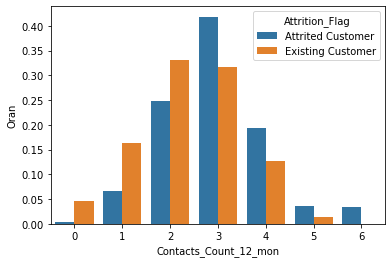

In [82]:
sns.barplot(data=active, x="Contacts_Count_12_mon", y="Oran", hue="Attrition_Flag")

In [83]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Contacts_Count_12_mon'], df['Attrition_Flag']))

In [84]:
p

1.8885110326157904e-123

Anlamlı!!!. Attrited müşteriler daha çok bankayla iletişim kuruyor.

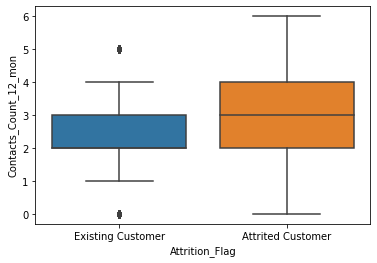

In [85]:
sns.boxplot(data=df, x="Attrition_Flag", y="Contacts_Count_12_mon")

In [86]:
df.Total_Revolving_Bal.value_counts()

0       2470
2517     508
1480      12
1965      12
1720      11
        ... 
2171       1
154        1
2211       1
170        1
2068       1
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

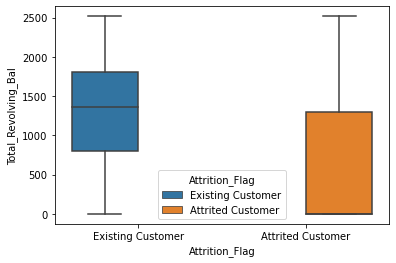

In [87]:
sns.boxplot(data=df, x="Attrition_Flag", y="Total_Revolving_Bal", hue="Attrition_Flag")

Attrited customersların total revolving balancelarının daha az olduğu hatta medyanların 0 olduğu görülüyor.

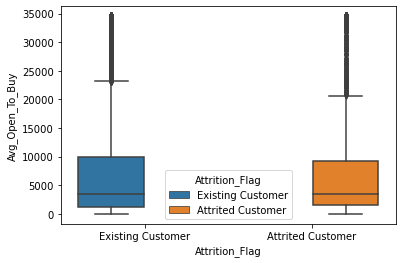

In [88]:
sns.boxplot(data=df, x="Attrition_Flag", y="Avg_Open_To_Buy", hue="Attrition_Flag")

Outliers olmasına rağmen iki grup için bir farklılık gözükmüyor.

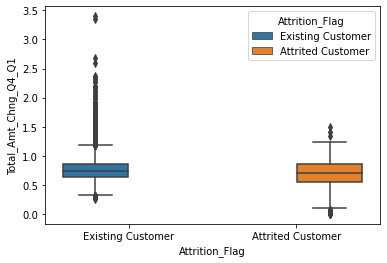

In [89]:
sns.boxplot(data=df, x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag")

Outliers olmasına rağmen iki grup için bir farklılık gözükmüyor.

Text(0.5, 1.0, 'Total Trans Amt vs Churners')

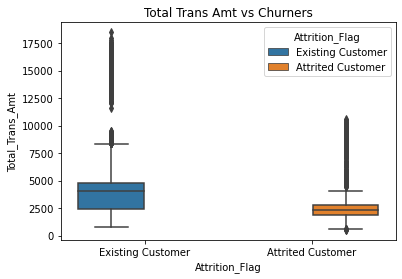

In [90]:
sns.boxplot(data=df, x="Attrition_Flag", y="Total_Trans_Amt", hue="Attrition_Flag")
plt.title("Total Trans Amt vs Churners")

In [91]:
df["Attrition_Coded"] = df.replace({"Attrition_Flag": {"Existing Customer" : 1, "Attrited Customer" : 0}}).Attrition_Flag

In [92]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   

   Months_on_book  ... Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
0              39  ...      12691.0                 777         11914.0   
2              36  ...       3418.0                   0          3418.0   
3              34  ...       3313.0                2517           796.0   
4              21  ...       4716.0                   0          4716.0   
5              36  ...       4010.0                1247          2763.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   

   Avg_Utilization_Ratio  Months_on_book_new  Attrition_Coded  
0                  0.061                orta                1  
2                  0.000                orta                1  
3                  0.760                orta                1  
4                  0.000                  az                1  
5                  0.311                orta                1  

[5 rows x 23 columns]

In [93]:
istatistik, p = mannwhitneyu(df[df['Attrition_Coded']==1]["Total_Trans_Amt"],df[df['Attrition_Coded']==0]["Total_Trans_Amt"])

In [94]:
p

1.1284405428055043e-112

Grafikte de görüldüğü üzere Attrited Customerların total transaction amountları daha az.

In [95]:
df.Total_Trans_Ct.value_counts()

81     208
75     203
71     203
82     202
69     202
      ... 
11       2
138      1
139      1
132      1
134      1
Name: Total_Trans_Ct, Length: 126, dtype: int64

Text(0.5, 1.0, 'Total Trans Ct vs Churners')

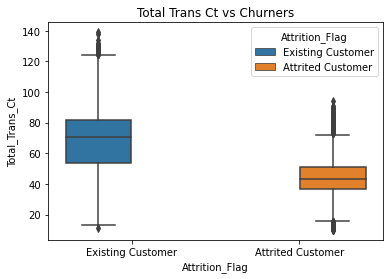

In [96]:
sns.boxplot(data=df, x="Attrition_Flag", y="Total_Trans_Ct", hue="Attrition_Flag")
plt.title("Total Trans Ct vs Churners")

In [97]:
istatistik, p = mannwhitneyu(df[df['Attrition_Coded']==1]["Total_Trans_Ct"], df[df['Attrition_Coded']==0]["Total_Trans_Ct"])

In [98]:
p

0.0

Grafikte de görüldüğü üzere Total Transaction adedi attrited customerlarda daha az.

Text(0.5, 1.0, 'Total Trans Ct vs Churners')

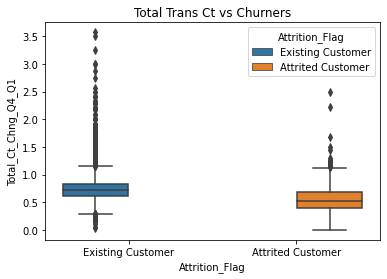

In [99]:
sns.boxplot(data=df, x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag")
plt.title("Total Trans Ct vs Churners")

In [100]:
istatistik, p = mannwhitneyu(df[df['Attrition_Coded']==1]["Total_Ct_Chng_Q4_Q1"], df[df['Attrition_Coded']==0]["Total_Ct_Chng_Q4_Q1"])

In [101]:
p

1.086471041595272e-216

4. çeyrekten 1. çeyreğe değişimlerde anlamlı bir farklılık olduğunu görüyoruz.

Text(0.5, 1.0, 'Avg. Utilization vs Churners')

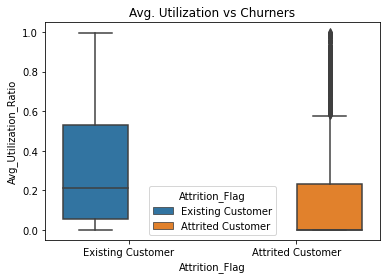

In [102]:
sns.boxplot(data=df, x="Attrition_Flag", y="Avg_Utilization_Ratio", hue="Attrition_Flag")
plt.title("Avg. Utilization vs Churners")

Average Utilization existing customerlarda daha fazla.

In [110]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Months_on_book_new', 'Attrition_Coded'],
      dtype='object')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


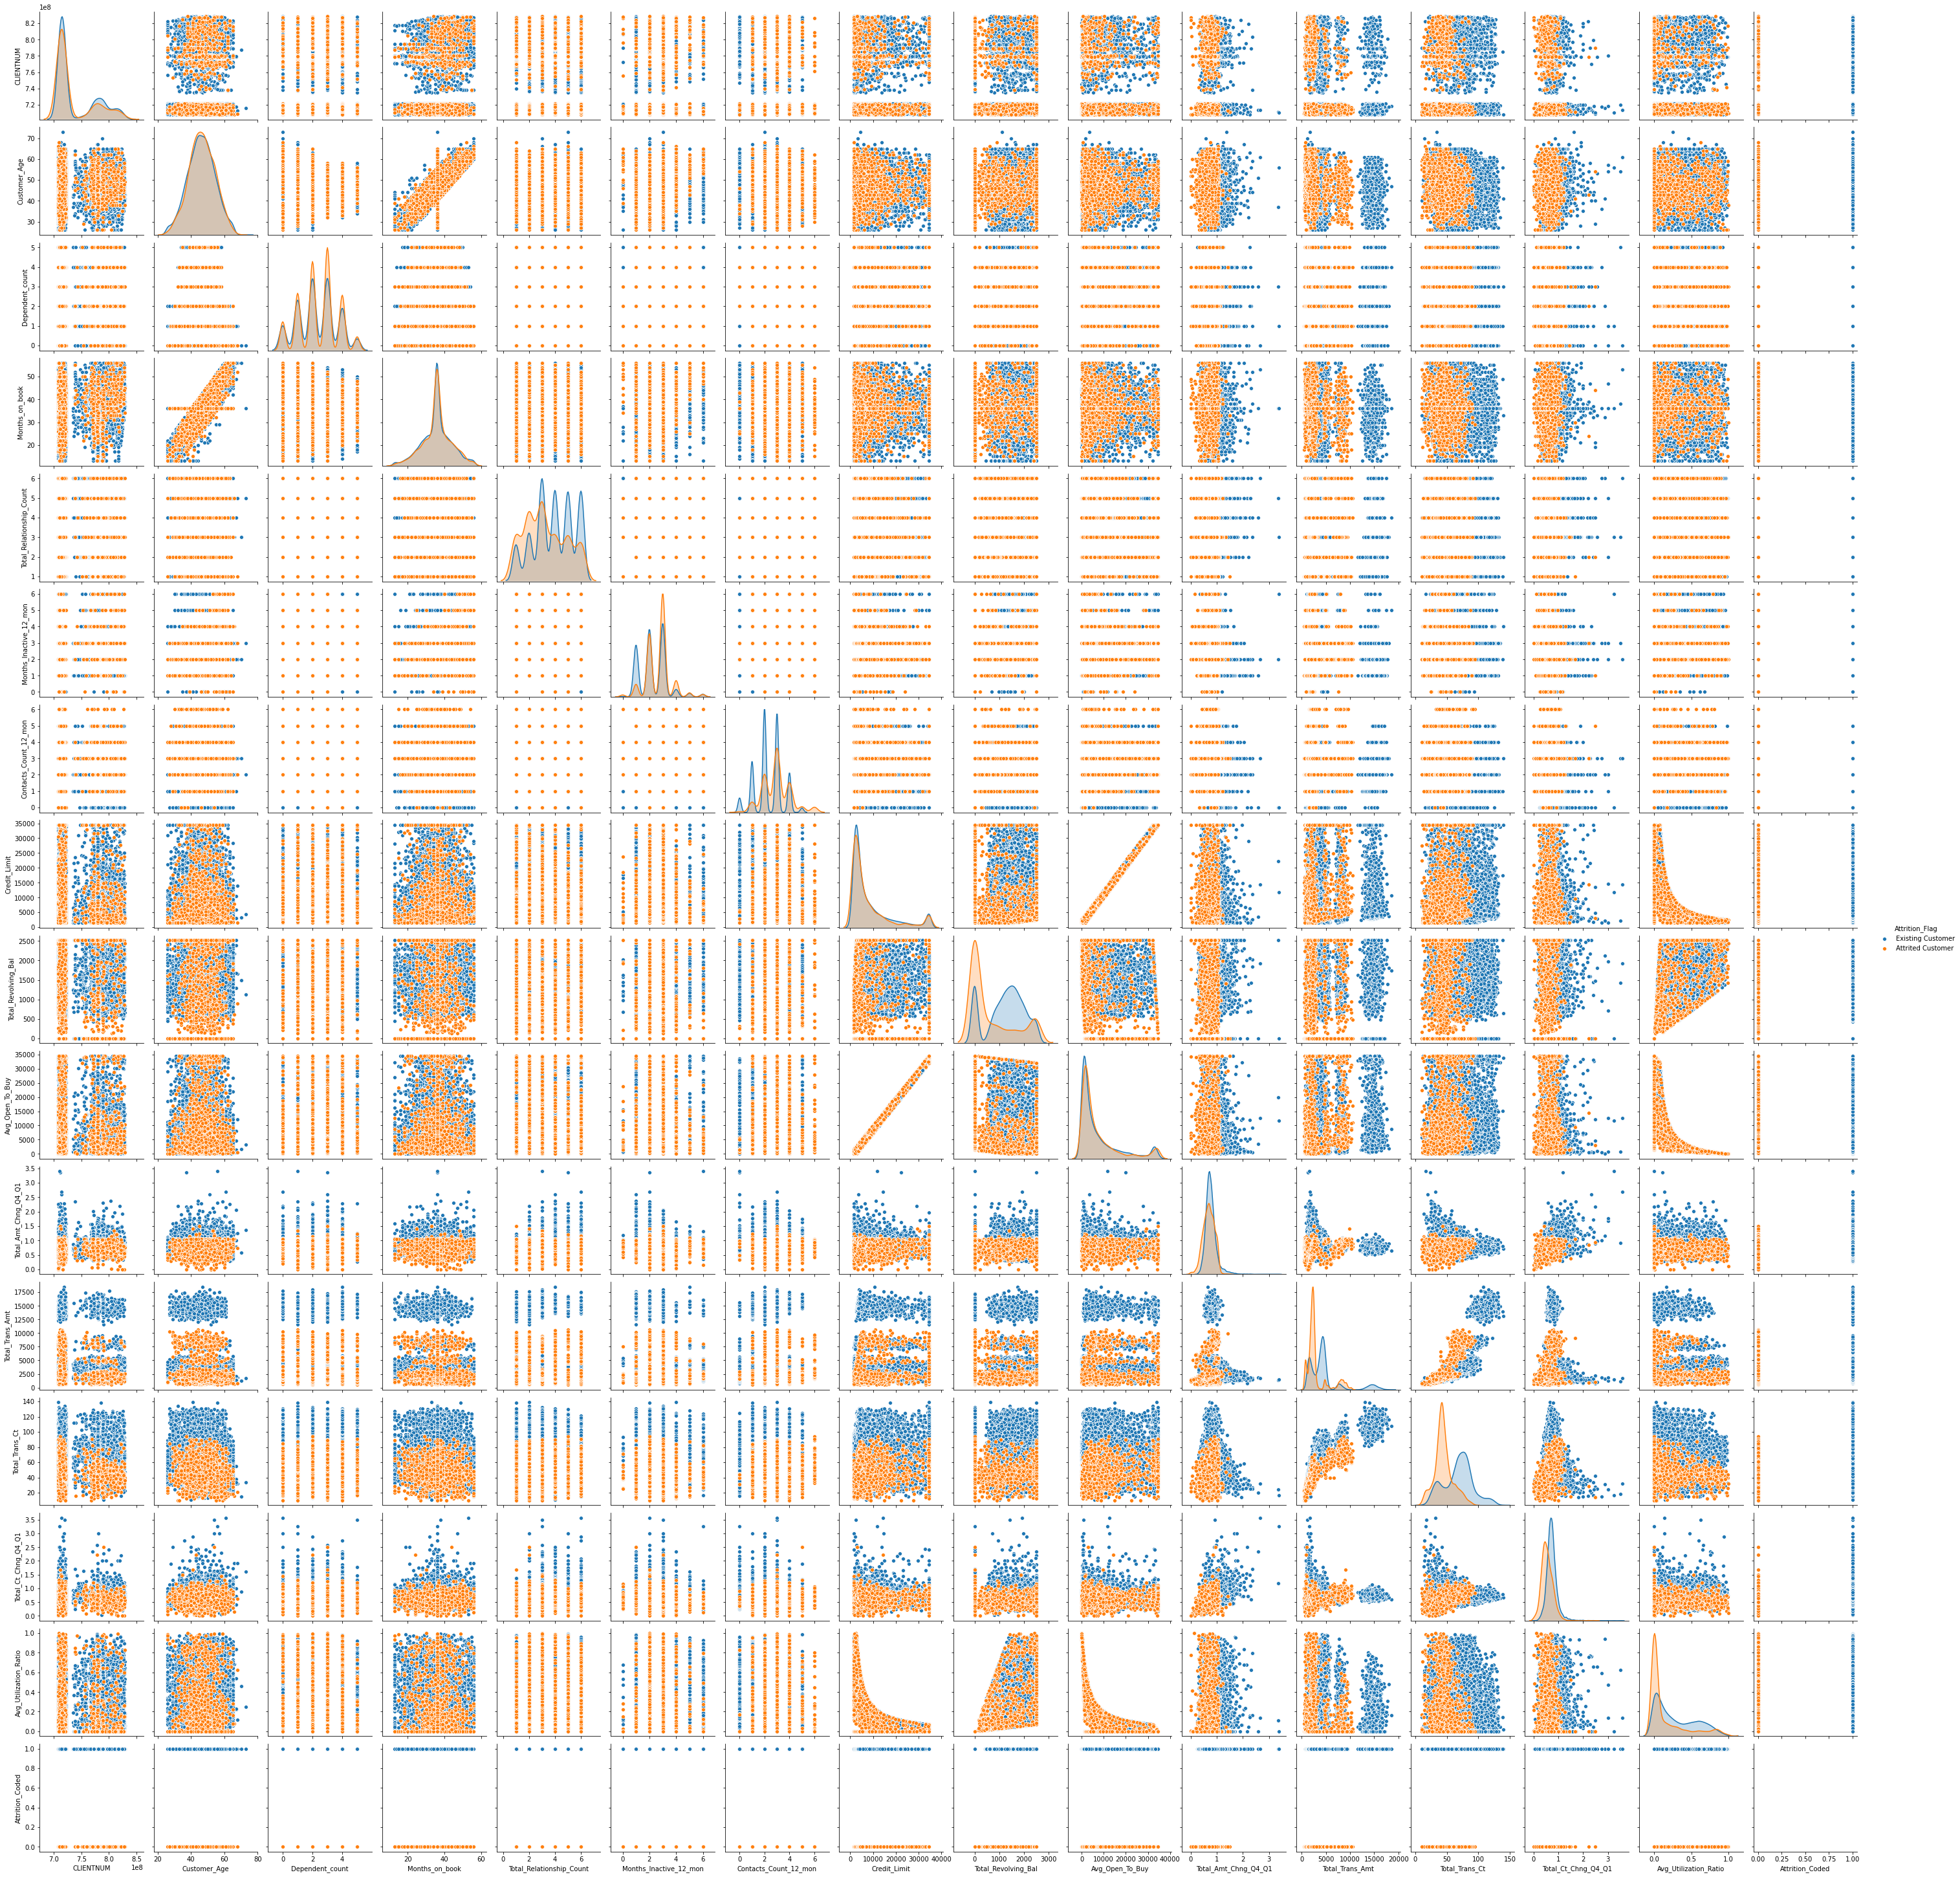

In [109]:
sns.pairplot(data=df, hue="Attrition_Flag")

In [103]:
import statsmodels.api as sm

In [104]:
bağımlı = df["Attrition_Coded"]

In [105]:
bağımsız = df[["Avg_Utilization_Ratio","Total_Ct_Chng_Q4_Q1","Total_Trans_Ct","Total_Trans_Amt","Total_Revolving_Bal","Contacts_Count_12_mon","Months_Inactive_12_mon","Total_Relationship_Count"]]

In [106]:
print(pd.get_dummies(bağımsız, drop_first=True))
bağımsız = pd.get_dummies(bağımsız, drop_first=True)

       Avg_Utilization_Ratio  Total_Ct_Chng_Q4_Q1  Total_Trans_Ct  \
0                      0.061                1.625              42   
2                      0.000                2.333              20   
3                      0.760                2.333              20   
4                      0.000                2.500              28   
5                      0.311                0.846              24   
...                      ...                  ...             ...   
10122                  0.462                0.857             117   
10123                  0.511                0.683              69   
10124                  0.000                0.818              60   
10125                  0.000                0.722              62   
10126                  0.189                0.649              61   

       Total_Trans_Amt  Total_Revolving_Bal  Contacts_Count_12_mon_1  \
0                 1144                  777                        0   
2                 1887     

In [107]:
lr = sm.Logit(bağımlı, sm.add_constant(bağımsız)).fit()

Optimization terminated successfully.
         Current function value: 0.225634
         Iterations 23


In [108]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Attrition_Coded   No. Observations:                10126
Model:                          Logit   Df Residuals:                    10103
Method:                           MLE   Df Model:                           22
Date:                Sat, 09 Jan 2021   Pseudo R-squ.:                  0.4881
Time:                        19:18:30   Log-Likelihood:                -2284.8
converged:                       True   LL-Null:                       -4463.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -7.3935      0.798     -9.270      0.000      -8.957      -5.830
Avg_Utilization_Ratio         -0.3744      0.202     -1.850      0.064      -0.771       0.022
Total_Ct_Chng_Q4_Q1            3.1300      0.181     17.323      0.000       2.776       3.484
Total_Trans_Ct                 0.1107      0.004     30.167      0.000       0.103       0.118
Total_Trans_Amt               -0.0004   2.34e-05    -17.387      0.000      -0.000      -0.000
Total_Revolving_Bal            0.0011   6.52e-05     16.453      0.000       0.001       0.001
Contacts_Count_12_mon_1       -2.0763      0.436     -4.764      0.000      -2.931      -1.222
Contacts_Count_12_mon_2       -2.2640      0.421     -5.378      0.000      -3.089      -1.439
Contacts_Count_12_mon_3       -2.8993      0.420     -6.908      0.000      -3.722      -2.077
Contacts_Count_12_mon_4       -2.9170      0.426     -6.855      0.000      -3.751      -2.083
Contacts_Count_12_mon_5       -3.5874      0.482     -7.436      0.000      -4.533      -2.642
Contacts_Count_12_mon_6      -43.3594   2.65e+07  -1.63e-06      1.000    -5.2e+07     5.2e+07
Months_Inactive_12_mon_1       3.9301      0.653      6.016      0.000       2.650       5.210
Months_Inactive_12_mon_2       2.5377      0.644      3.938      0.000       1.275       3.801
Months_Inactive_12_mon_3       2.0919      0.643      3.253      0.001       0.831       3.352
Months_Inactive_12_mon_4       1.5501      0.660      2.348      0.019       0.256       2.844
Months_Inactive_12_mon_5       2.0244      0.700      2.891      0.004       0.652       3.397
Months_Inactive_12_mon_6       2.4102      0.733      3.288      0.001       0.973       3.847
Total_Relationship_Count_2     0.0431      0.156      0.277      0.782      -0.262       0.348
Total_Relationship_Count_3     1.7496      0.156     11.197      0.000       1.443       2.056
Total_Relationship_Count_4     2.0391      0.162     12.570      0.000       1.721       2.357
Total_Relationship_Count_5     2.1273      0.165     12.896      0.000       1.804       2.451
Total_Relationship_Count_6     2.2775      0.167     13.668      0.000       1.951       2.604
==============================================================================================
"""

Avg_Utilization_rate değişkenimiz hariç tüm sayısal değişkenlerimizde ve kategorik değişkenlerimizin kategorilerininde de istatistiksel olarak anlamlılıklar mevcut.

Verimizden çıkarım yapmak gerekirse Attrited Customer olmaya meyilli müşteri profilleri aşağıdaki gibidir.

1. Total transaction adedi az olanlar.
2. Total transaction tutarı az olanlar.
3. Revolving balance'ı az olanlar.
4. Bankayla daha çok iletişime geçenler.
5. Bankayla hiç iletişime geçmeyenler.
6. Banka ürünlerini daha az kullanan müşteriler.